In [433]:
import pandas as pd
import os

import numpy as np
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import feature_selection, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [401]:
df = pd.read_csv('titanic-train.csv')

In [402]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,...,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",male,...,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",male,...,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",male,...,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",female,...,0,237668,13.0000,S,1060
5,328,0,2,"Stanton, Mr. Samuel Ward",male,...,0,237734,15.0458,C,328
6,729,1,3,"Karun, Mr. Franz",male,...,1,349256,13.4167,C,729
7,552,0,3,"Bostandyeff, Mr. Guentcho",male,...,0,349224,7.8958,S,552
8,296,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,...,5,347082,31.2750,S,296
9,1257,0,3,"Lindell, Mr. Edvard Bengtsson",male,...,0,349910,15.5500,S,1257


In [403]:
df.columns

Index([u'Unnamed: 0', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked', u'PassengerId'],
      dtype='object')

In [404]:
df.isnull().sum()

Unnamed: 0       0
Survived         0
Pclass           0
Name             0
Sex              0
Age            172
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
PassengerId      0
dtype: int64

In [405]:
df[df['Age'].isnull()]

,Unnamed: 0,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Embarked,PassengerId
10,458,1,3,"McCormack, Mr. Thomas Joseph",male,...,0,367228,7.7500,Q,458
22,762,0,1,"Harrington, Mr. Charles H",male,...,0,113796,42.4000,S,762
38,216,1,3,"Hee, Mr. Ling",male,...,0,1601,56.4958,S,216
40,1287,0,3,"Keefe, Mr. Arthur",male,...,0,323592,7.2500,S,1287
43,653,1,3,"Glynn, Miss. Mary Agatha",female,...,0,335677,7.7500,Q,653
45,1072,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,...,0,2626,7.2292,C,1072
47,145,0,3,"Lennon, Mr. Denis",male,...,0,370371,15.5000,Q,145
49,1123,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,...,0,PC 17611,133.6500,S,1123
52,353,1,3,"Foo, Mr. Choong",male,...,0,1601,56.4958,S,353
57,628,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,...,0,370365,15.5000,Q,628


In [406]:
df.var()

Unnamed: 0     142264.434054
Survived            0.238803
Pclass              0.701112
Age               203.232726
SibSp               0.868630
Parch               0.691670
Fare             2553.858452
PassengerId    142264.434054
dtype: float64

In [407]:
 df_2 = df.dropna()

In [408]:
df_2

,Unnamed: 0,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,...,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",male,...,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",male,...,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",male,...,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",female,...,0,237668,13.0000,S,1060
5,328,0,2,"Stanton, Mr. Samuel Ward",male,...,0,237734,15.0458,C,328
6,729,1,3,"Karun, Mr. Franz",male,...,1,349256,13.4167,C,729
7,552,0,3,"Bostandyeff, Mr. Guentcho",male,...,0,349224,7.8958,S,552
8,296,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,...,5,347082,31.2750,S,296
9,1257,0,3,"Lindell, Mr. Edvard Bengtsson",male,...,0,349910,15.5500,S,1257


In [409]:
df_2.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,647.820917,0.418338,2.216332,29.457856,0.505731,0.434097,35.464971,647.820917
std,379.477562,0.493640,0.840453,14.181381,0.911017,0.825932,54.115270,379.477562
min,1.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,318.250000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,318.250000
50%,640.500000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,640.500000
75%,971.750000,1.000000,3.000000,38.000000,1.000000,1.000000,34.375000,971.750000
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200,1307.000000


In [410]:
df.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
count,873.000000,873.000000,873.000000,701.000000,873.000000,873.000000,872.000000,873.000000
mean,648.357388,0.392898,2.300115,29.560747,0.469645,0.387171,32.368950,648.357388
std,377.179578,0.488674,0.837325,14.255972,0.932003,0.831667,50.535715,377.179578
min,1.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,322.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,322.000000
50%,638.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.479150,638.000000
75%,972.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.017700,972.000000
max,1307.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1307.000000


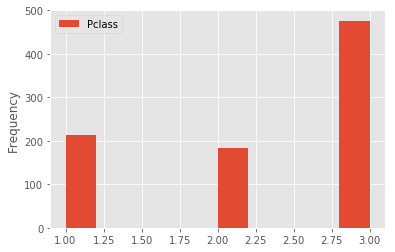

In [411]:
df[['Pclass']].plot(kind = 'hist')

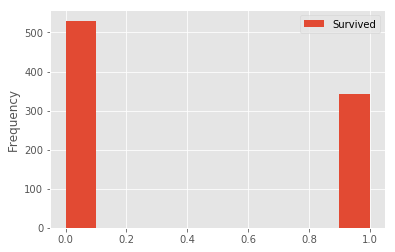

In [412]:
df[['Survived']].plot(kind = 'hist')

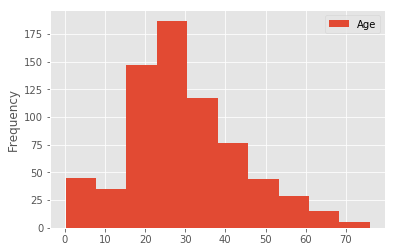

In [413]:
df[['Age']].plot(kind = 'hist')

In [414]:
df.corr()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
Unnamed: 0,1.000000,0.006311,0.025241,0.020005,0.001659,0.019943,-0.028013,1.000000
Survived,0.006311,1.000000,-0.338951,-0.034977,-0.012812,0.107791,0.257220,0.006311
Pclass,0.025241,-0.338951,1.000000,-0.377474,0.064589,0.000924,-0.557365,0.025241
Age,0.020005,-0.034977,-0.377474,1.000000,-0.262496,-0.161495,0.139542,0.020005
SibSp,0.001659,-0.012812,0.064589,-0.262496,1.000000,0.358425,0.136756,0.001659
Parch,0.019943,0.107791,0.000924,-0.161495,0.358425,1.000000,0.189630,0.019943
Fare,-0.028013,0.257220,-0.557365,0.139542,0.136756,0.189630,1.000000,-0.028013
PassengerId,1.000000,0.006311,0.025241,0.020005,0.001659,0.019943,-0.028013,1.000000


In [415]:
df_2.corr()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
Unnamed: 0,1.000000,0.004705,0.045498,0.023910,0.010044,0.018334,-0.029549,1.000000
Survived,0.004705,1.000000,-0.349857,-0.037545,-0.014909,0.134577,0.261776,0.004705
Pclass,0.045498,-0.349857,1.000000,-0.378585,0.070520,0.007133,-0.558110,0.045498
Age,0.023910,-0.037545,-0.378585,1.000000,-0.260585,-0.158971,0.136828,0.023910
SibSp,0.010044,-0.014909,0.070520,-0.260585,1.000000,0.358020,0.123235,0.010044
Parch,0.018334,0.134577,0.007133,-0.158971,0.358020,1.000000,0.184848,0.018334
Fare,-0.029549,0.261776,-0.558110,0.136828,0.123235,0.184848,1.000000,-0.029549
PassengerId,1.000000,0.004705,0.045498,0.023910,0.010044,0.018334,-0.029549,1.000000


In [416]:
model = smf.ols(formula = 'Survived ~ Pclass', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     113.1
Date:                Wed, 24 May 2017   Prob (F-statistic):           6.54e-25
Time:                        21:06:04   Log-Likelihood:                -559.84
No. Observations:                 873   AIC:                             1124.
Df Residuals:                     871   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.046     18.620      0.000       0.759       0.937
Pclass        -0.1978      0.019    -10.633      0.000      -0.234      -0.161
==============================================================================
Omnibus:                     1908.301   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.328
Skew:                           0.402   Prob(JB):                     2.96e-19
Kurtosis:                       1.696   Cond. No.                         8.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [417]:
model = smf.ols(formula = 'Survived ~ Fare', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     61.64
Date:                Wed, 24 May 2017   Prob (F-statistic):           1.21e-14
Time:                        21:06:04   Log-Likelihood:                -582.74
No. Observations:                 872   AIC:                             1169.
Df Residuals:                     870   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3128      0.019     16.457      0.000       0.276       0.350
Fare           0.0025      0.000      7.851      0.000       0.002       0.003
==============================================================================
Omnibus:                       27.411   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.359
Skew:                           0.450   Prob(JB):                     2.69e-27
Kurtosis:                       1.401   Cond. No.                         71.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [418]:
model = smf.ols(formula = 'Survived ~ Embarked', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     9.438
Date:                Wed, 24 May 2017   Prob (F-statistic):           8.81e-05
Time:                        21:06:04   Log-Likelihood:                -601.79
No. Observations:                 871   AIC:                             1210.
Df Residuals:                     868   BIC:                             1224.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5349      0.037     14.503      0.000       0.462       0.607
Embarked[T.Q]    -0.1892      0.065     -2.903      0.004      -0.317      -0.061
Embarked[T.S]    -0.1773      0.042     -4.251      0.000      -0.259      -0.095
==============================================================================
Omnibus:                       26.178   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.717
Skew:                           0.440   Prob(JB):                     5.58e-30
Kurtosis:                       1.286   Cond. No.                         5.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [419]:
model = smf.ols(formula = 'Survived ~ Sex', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     336.2
Date:                Wed, 24 May 2017   Prob (F-statistic):           9.39e-64
Time:                        21:06:04   Log-Likelihood:                -470.64
No. Observations:                 873   AIC:                             945.3
Df Residuals:                     871   BIC:                             954.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7284      0.023     31.568      0.000       0.683       0.774
Sex[T.male]    -0.5335      0.029    -18.335      0.000      -0.591      -0.476
==============================================================================
Omnibus:                       21.499   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.218
Skew:                           0.374   Prob(JB):                     1.50e-05
Kurtosis:                       2.771   Cond. No.                         3.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [420]:
model = smf.ols(formula = 'Survived ~ Pclass + Sex + Age + SibSp', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     105.0
Date:                Wed, 24 May 2017   Prob (F-statistic):           5.72e-70
Time:                        21:06:04   Log-Likelihood:                -334.05
No. Observations:                 701   AIC:                             678.1
Df Residuals:                     696   BIC:                             700.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3178      0.067     19.589      0.000       1.186       1.450
Sex[T.male]    -0.4874      0.031    -15.550      0.000      -0.549      -0.426
Pclass         -0.1909      0.019     -9.852      0.000      -0.229      -0.153
Age            -0.0050      0.001     -4.320      0.000      -0.007      -0.003
SibSp          -0.0526      0.017     -3.098      0.002      -0.086      -0.019
==============================================================================
Omnibus:                       23.259   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.047
Skew:                           0.458   Prob(JB):                     3.64e-06
Kurtosis:                       2.868   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [421]:
df.columns

Index([u'Unnamed: 0', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked', u'PassengerId'],
      dtype='object')

In [422]:
df['young_man'] = df['sex'] = 'Male' and df['Age'] < 30

In [423]:
df.young_man.sum()

386

In [424]:
df[['Survived' , 'young_man']].sum()

Survived     343.0
young_man    386.0
dtype: float64

In [425]:
df['old_lady'] = df['sex'] = 'Female' and df['Age'] > 50

In [426]:
df[['old_lady', 'Survived']].sum()

old_lady     61.0
Survived    343.0
dtype: float64

In [427]:
df['rich_guy'] = df['sex'] = 'male' and df['Pclass'] < 2
df.rich_guy.sum()

214

In [428]:
df['ismale'] = df['sex'] = 'male'
df.ismale.replace('male', 1).sum()

873

In [429]:
df = df.dropna()

In [430]:
X = df[ ['Age', 'Pclass', 'rich_guy', 'Fare'] ]
c = df.Survived

model = linear_model.LogisticRegression(penalty = 'l2').\
    fit(X, c)

In [431]:
model.score(X, c)

0.70773638968481378

In [432]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,348,146
1,58,146
